# Data Analysis

## Import

In [38]:
import pandas as pd # For handling and analyzing tabular data

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

import re # For validating and manipulating text
import numpy as np # For numeric calculation

## Read cleaned data from CSV file

In [39]:
anime_data = pd.read_csv('./data/anime_data_cleaned.csv')

# Check
anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,2471,Doraemon (1979),Doraemon,tv,finished_airing,Spring 1979,"Adventure, Anthropomorphic, Comedy, Fantasy, K...",7.86,39342,66089,Shin-Ei Animation,pg
1,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,863786,1258233,Toei Animation,pg_13
2,966,Crayon Shin-chan,Shin Chan,tv,currently_airing,Spring 1992,"Comedy, Ecchi, School, Seinen",7.80,41800,87019,Shin-Ei Animation,g
3,170,Slam Dunk,Slam Dunk,tv,finished_airing,Fall 1993,"School, Shounen, Sports, Team Sports",8.55,141218,312658,Toei Animation,pg_13
4,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.41,6075,16889,Gallop,g
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,56228,Rekishi ni Nokoru Akujo ni Naru zo,I'll Become a Villainess Who Goes Down in History,tv,currently_airing,Fall 2024,"Comedy, Fantasy, Isekai, Romance, Shoujo, Vill...",7.06,8835,61849,Maho Film,pg_13
2146,57102,Houkago Shounen Hanako-kun Part 2,After-School Hanako-kun Part 2,tv,finished_airing,Fall 2024,"Comedy, School, Supernatural",7.02,5245,29133,Lerche,pg_13
2147,54726,"Tsuma, Shougakusei ni Naru.",TsumaSho,tv,currently_airing,Fall 2024,"Comedy, Reincarnation, Romance, Seinen",7.23,5155,41356,Studio Signpost,pg_13
2148,53033,Mecha-ude (TV),Mecha-Ude: Mechanical Arms,tv,currently_airing,Fall 2024,"Action, Sci-Fi",7.07,5015,39806,TriF Studio,pg_13


## Question 01: What are user reviews on MAL for different anime genres like?
### Benefits of finding answer
- Understand audience **tastes** and **preferences** for watching anime.
- Gain an **overall** perspective on the **quality** of each anime genre.
### Find the answer by using data
- Calculate the **average** ```User Score``` for each **genre** (in ```included_genres```).
- Visualize to **compare** between **genres** and provide **comments**.

In [40]:
# Genres list
included_genres = [
    'action', 'adventure', 'comedy', 'drama', 'fantasy',
    'mystery', 'romance', 'sci-fi', 'sports',
    'slice of life', 'horror', 'supernatural'
]

In [41]:
# Calculate average User Score for each genre
genre_scores = (
    anime_data[['Genres', 'User Score']]
    .assign(Genres=anime_data['Genres'].str.split(', ')) # Split Genres into lists
    .explode('Genres') # Expand each genre into its own row
    .query('Genres.str.lower() in @included_genres', engine='python') # Filter for included genres
    .groupby('Genres', as_index=False) # Group by genres
    .agg({'User Score': 'mean'}) # Calculate the mean User Score
    .sort_values(by='User Score', ascending=False) # Sort by User Score decreasingly
    .rename(columns={'Genres': 'Genre', 'User Score': 'Average User Score'})  # Rename columns
    .round({'Average User Score': 2})  # Round Average User Score to 2 decimal places
    .reset_index(drop=True) # Fix indices
)

genre_scores

,Genre,Average User Score
0,Sports,7.70
1,Mystery,7.69
2,Slice of Life,7.69
3,Drama,7.66
4,Supernatural,7.66
5,Action,7.55
6,Adventure,7.50
7,Romance,7.49
8,Fantasy,7.47
9,Comedy,7.47


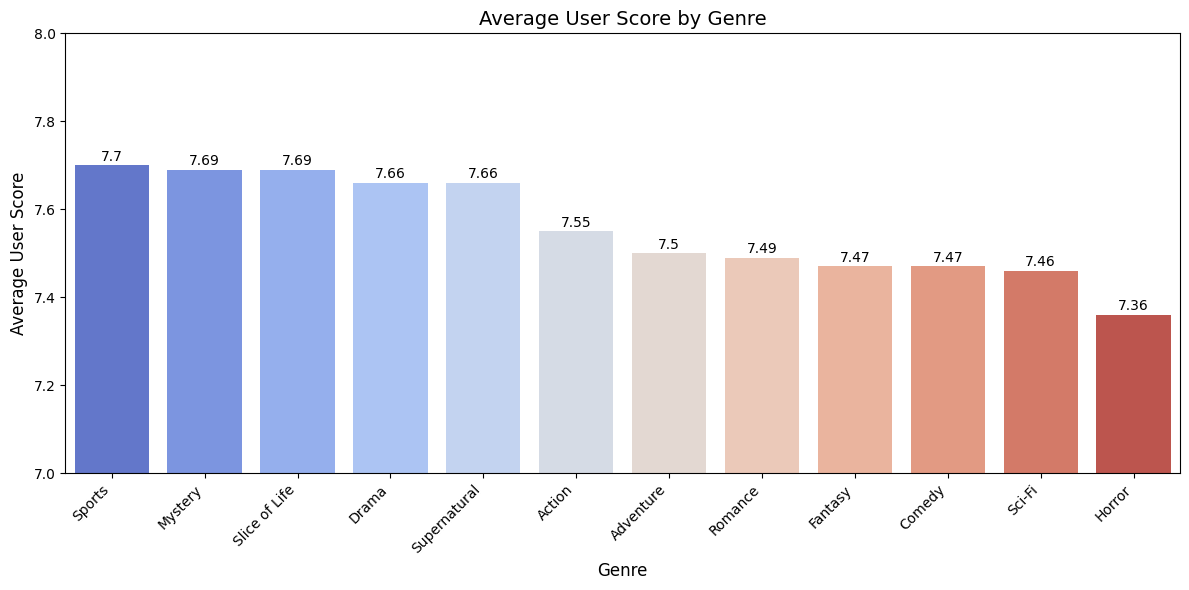

In [42]:
# Visualize the result by using vertical bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    x='Genre',
    y='Average User Score',
    data=genre_scores,
    palette='coolwarm',
    hue='Genre',
    legend=False
)

# Adjust Y-axis range to emphasize differences
plt.ylim(7, 8)  # Focus on the range of values

# Add specific values on top of each bar
for index, row in genre_scores.iterrows():
    bar_plot.text(
        x=index,
        y=row['Average User Score'] + 0.01,  # Position above the bar
        s=f"{row['Average User Score']}",
        ha='center',
        fontsize=10,
        color='black'
    )

plt.title("Average User Score by Genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average User Score", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

### Comments
- The audience's ratings for each anime genre are **quite good** ($\geq 7$).
- The **highest-rated** anime genre by audience is **Mystery** ($\approx 7.67$).
- The **lowest-rated** anime genre by audience is **Horror** ($\approx 7.33$).

$\rightarrow$ **Divide** the anime genres into $2$ groups, each containing $6$ genres:
- **Higher-rated** anime genres: Mystery, Slice of Life, Sports, Supernatural, Drama, Action.
- **Lower-rated** anime genres: Romance, Adventure, Fantasy, Comedy, Sci-Fi, Horror.

In [43]:
# Define 2 genre groups
higher_rated_genres = ['mystery', 'slice of life', 'sports', 'supernatural', 'drama', 'action']
lower_rated_genres = ['romance', 'adventure', 'fantasy', 'comedy', 'sci-fi', 'horror']

## Question 02: How have user ratings for different anime genres changed over time?
### Benefits of finding answer
- Understand the **changes** in audience **tastes** and **preferences** for watching anime over the years.
- **Assess** the development in the **quality** of each anime genre over the years.
### Find the answer by using data
- **Divide** anime genres into $2$ groups, each containing $6$ genres: the **highest**-rated anime genres and the **lowest**-rated anime genres (based on the results of the previous question).
- Visualize the **changes** in the quality (average ```User Score```) of anime genres over time within each group, **compare** them, and provide **comments**.

In [44]:
# Convert Premiered Season to a datetime format
def season_to_datetime(season):
    season_map = {'Winter': 1, 'Spring': 4, 'Summer': 7, 'Fall': 10}
    season_name, year = season.split()
    return pd.Timestamp(year=int(year), month=season_map[season_name], day=1)

In [45]:
# Calculate average User Score for each genre group over the seasons
season_genre_scores = (
    anime_data[['Genres', 'User Score', 'Premiered Season']]
    .assign(
        Genres=anime_data['Genres'].str.split(', '), # Split Genres into lists
        Date=anime_data['Premiered Season'].apply(season_to_datetime) # Convert to datetime
    )
    .explode('Genres') # Expand genres into individual rows
    .assign(
        Genre_Group=lambda df: df['Genres'].str.lower().apply(
            lambda x: 'Higher-rated' if x in higher_rated_genres else 'Lower-rated' if x in lower_rated_genres else None
        )
    )
    .query('Genre_Group.notnull()', engine='python') # Filter for defined genre groups
    .groupby(['Date', 'Genre_Group'], as_index=False) # Group by Date and Genre_Group
    .agg({'User Score': lambda x: round(x.mean(), 2)}) # Calculate and round the mean User Score
    .rename(columns={'User Score': 'Average User Score', 'Genre_Group': 'Genre Group'}) # Rename column
    .sort_values('Date') # Ensure chronological order
)

season_genre_scores

,Date,Genre Group,Average User Score
0,1979-04-01,Lower-rated,7.86
1,1989-04-01,Higher-rated,8.19
2,1989-04-01,Lower-rated,8.19
3,1992-04-01,Lower-rated,7.80
4,1993-10-01,Higher-rated,8.55
...,...,...,...
245,2024-04-01,Lower-rated,7.60
246,2024-07-01,Higher-rated,7.44
247,2024-07-01,Lower-rated,7.47
248,2024-10-01,Higher-rated,7.49


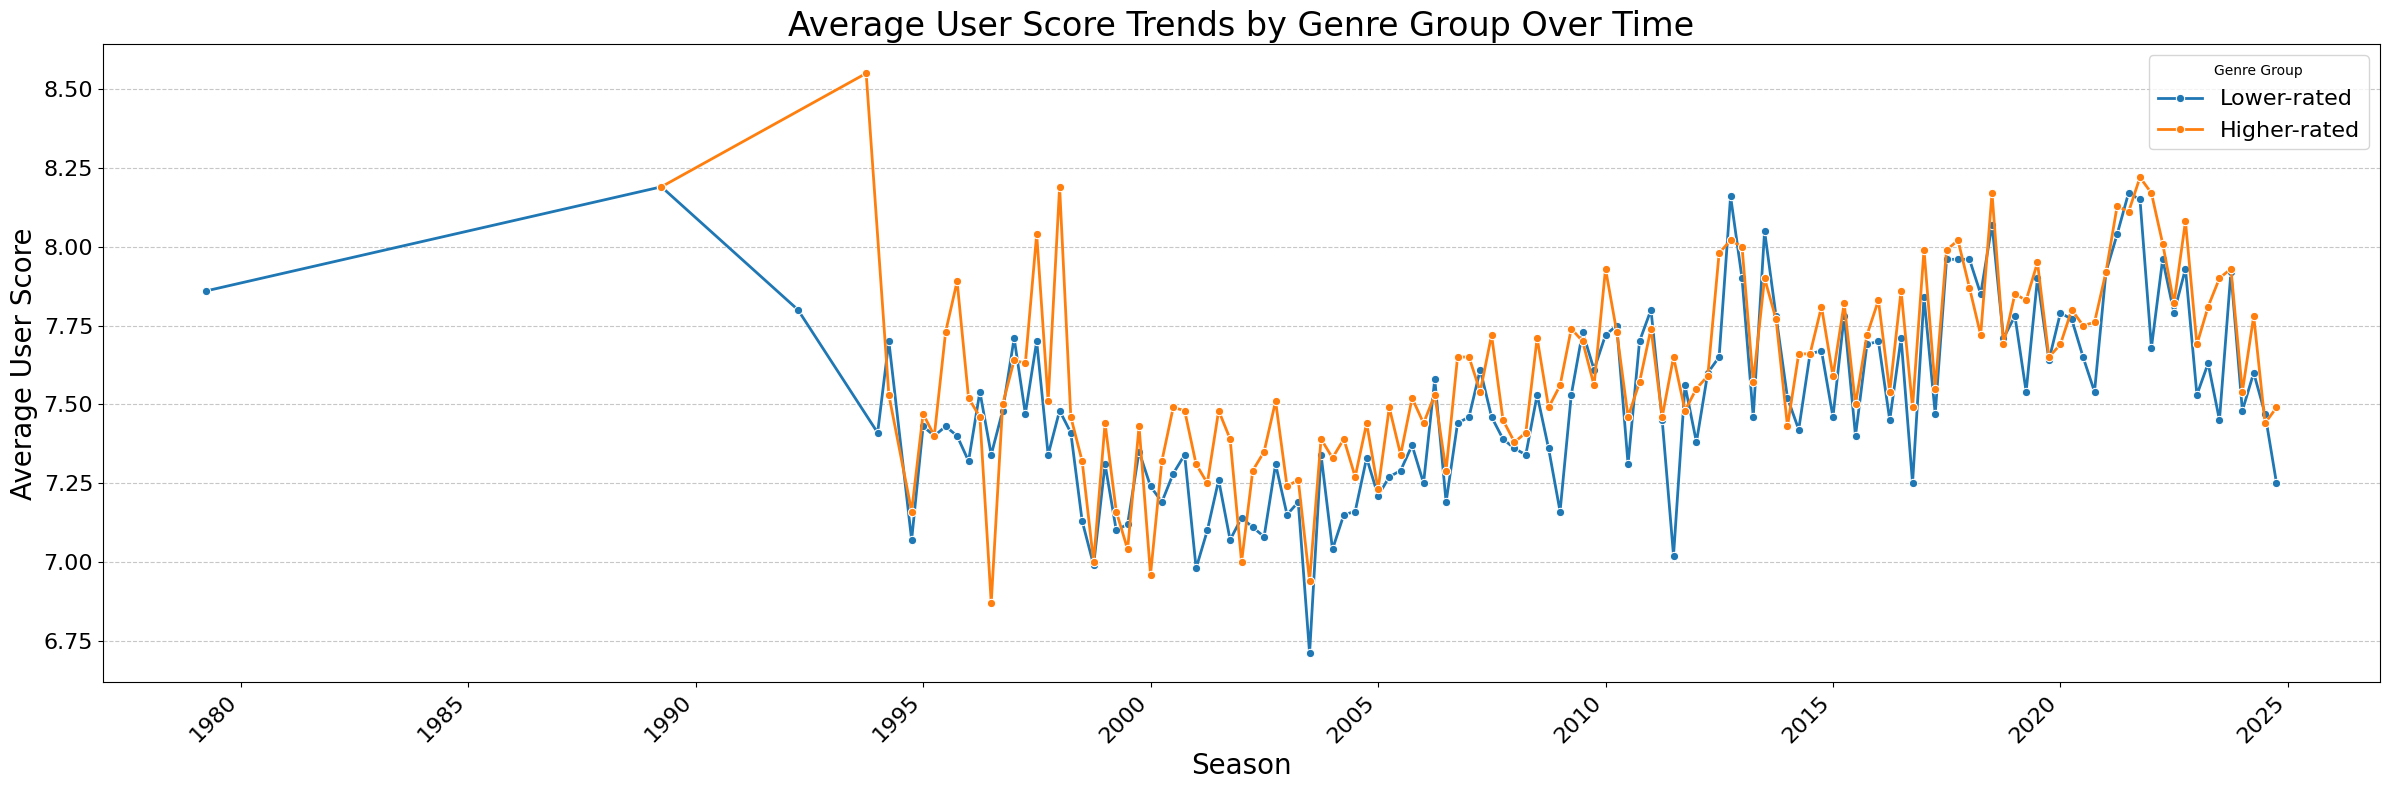

In [46]:
# Visualize the result by using line chart
plt.figure(figsize=(24, 8))
sns.lineplot(
    data=season_genre_scores,
    x='Date',
    y='Average User Score',
    hue='Genre Group',
    marker='o',
    linewidth=2
)

plt.title("Average User Score Trends by Genre Group Over Time", fontsize=24)
plt.xlabel("Season", fontsize=20)
plt.ylabel("Average User Score", fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Genre Group', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Comments

- Most of the time, **higher-rated** genres consistently receive **better** audience ratings (obviously).
- However, there are a **very small number** of **short periods** where lower-rated genres are rated **higher**, mostly concentrated in the **2010–2015** period.

$\rightarrow$ The **changes** in audience ratings over time are **incredibly complex** and **difficult to predict**, reflecting the **diverse development** of the anime market and the **shifting preferences** of viewers across different periods.

## Question 03: How has the number of anime in each genre changed over the years?
### Benefits of finding answer
- **Understand** and **analyze** the **development** of anime over the years.
- Combine with the results of the previous two questions to **identify and evaluate** the **relationship** between ```User Score```, **genres**, and the **number of anime**.
### Find the answer by using data
- Visualize the **changes** in the **number of anime** in each genre over time within each group, **compare** them, and provide **comments**.
- **Combine** with the **results** of the previous two questions to draw **final conclusions** about the **relationship** between ```User Score```, **genres**, and the **number of anime**.

In [47]:
# Calculate the number of anime for each genre group over the seasons
genre_anime_counts = (
    anime_data[['Genres', 'Premiered Season']]
    .assign(
        Genres=anime_data['Genres'].str.split(', '), # Split Genres into lists
        Date=anime_data['Premiered Season'].apply(season_to_datetime) # Convert to datetime
    )
    .explode('Genres') # Expand genres into individual rows
    .assign(
        Genre_Group=lambda df: df['Genres'].str.lower().apply(
            lambda x: 'Higher-rated' if x in higher_rated_genres else 'Lower-rated' if x in lower_rated_genres else None
        )
    )
    .query('Genre_Group.notnull()', engine='python')  # Filter for defined genre groups
    .groupby(['Date', 'Genre_Group'], as_index=False)  # Group by Date and Genre_Group
    .agg({'Genres': 'count'})  # Count the number of anime
    .rename(columns={'Genres': 'Count', 'Genre_Group': 'Genre Group'})  # Rename column
    .sort_values('Date')  # Ensure chronological order
)

genre_anime_counts

,Date,Genre Group,Count
0,1979-04-01,Lower-rated,4
1,1989-04-01,Higher-rated,1
2,1989-04-01,Lower-rated,3
3,1992-04-01,Lower-rated,1
4,1993-10-01,Higher-rated,1
...,...,...,...
245,2024-04-01,Lower-rated,36
246,2024-07-01,Higher-rated,12
247,2024-07-01,Lower-rated,35
248,2024-10-01,Higher-rated,26


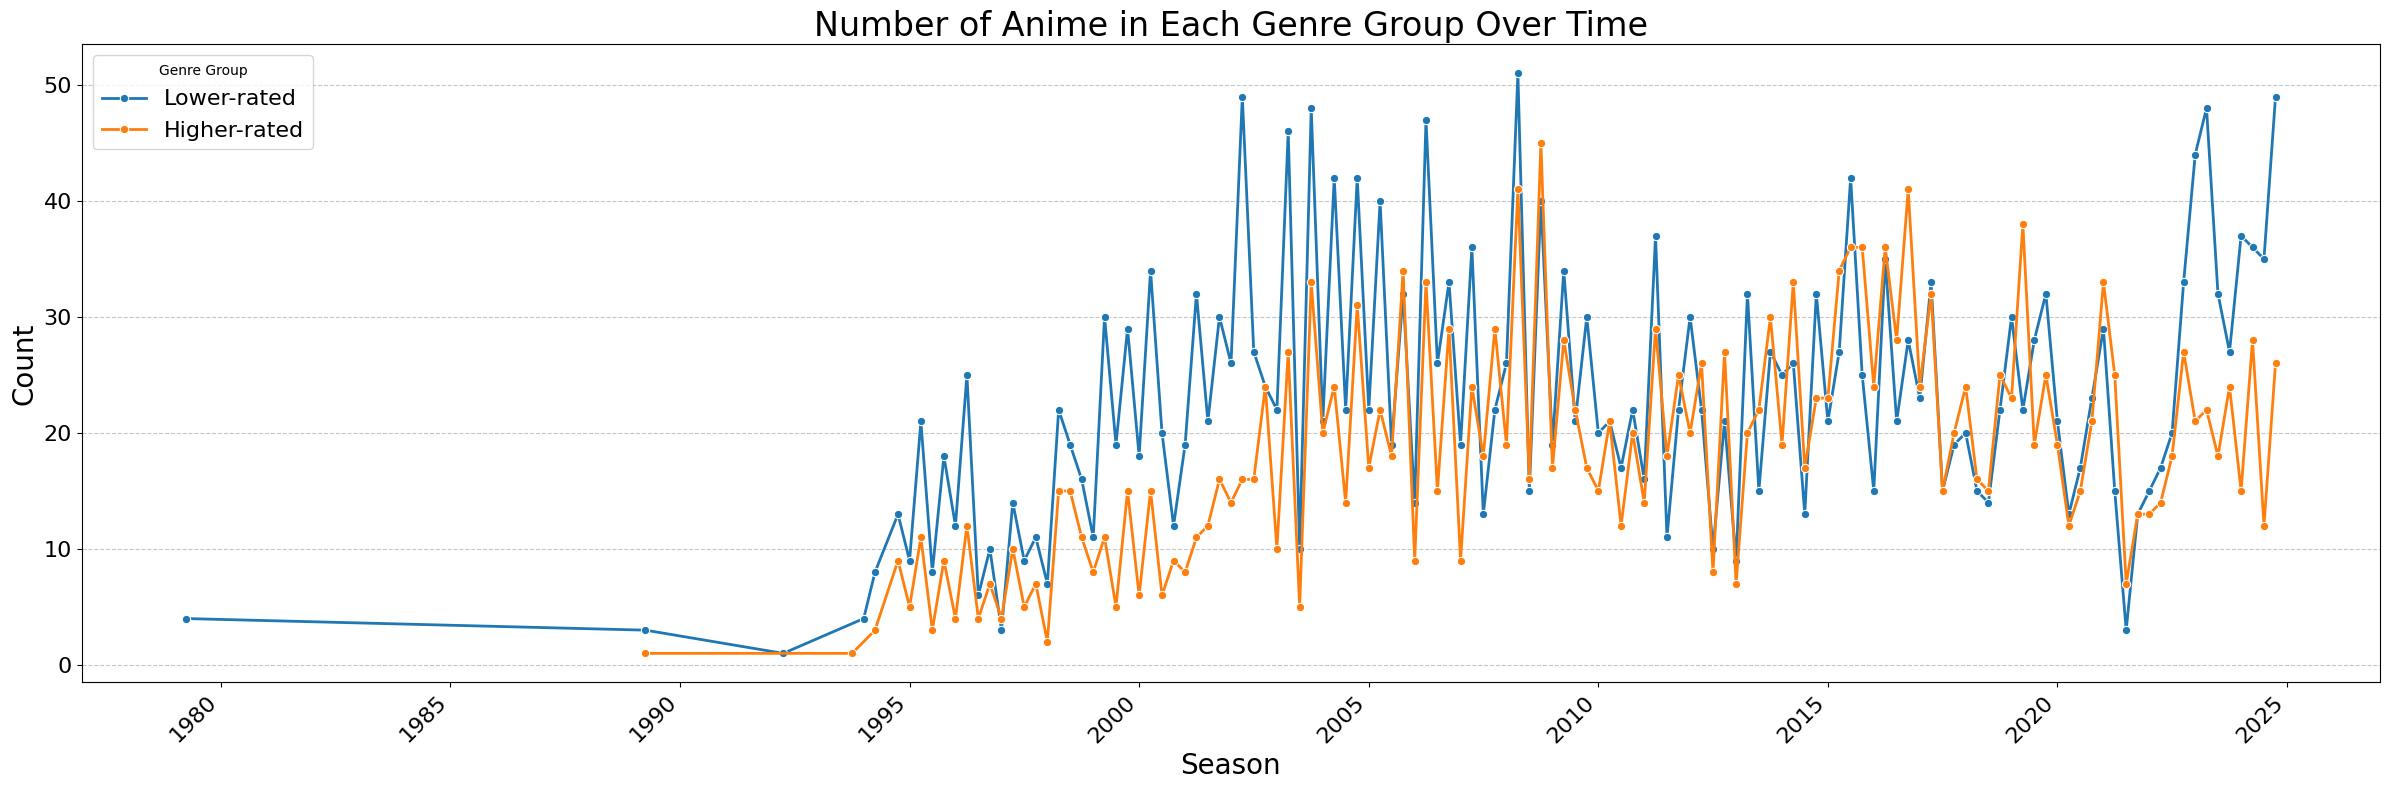

In [48]:
# Visualize the result by using line chart
plt.figure(figsize=(24, 8))
sns.lineplot(
    data=genre_anime_counts,
    x='Date',
    y='Count',
    hue='Genre Group',
    marker='o',
    linewidth=2
)
plt.title("Number of Anime in Each Genre Group Over Time", fontsize=24)
plt.xlabel("Season", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Genre Group', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Comments
- For the majority of the time, the number of anime in the **lower-rated** genre group is always **greater than** that of the higher-rated genre group, and **significantly greater** in many cases.
- During certain periods, the number of anime in the **higher-rated** genre group **slightly surpasses** that of the lower-rated genre group.
$\rightarrow$ The **change** in the **number of anime** over time is also **very complex**, with even **significant fluctuations** between **consecutive seasons**.

## Conclusions
- There is a **relationship** between **audience ratings** and the **number of anime**: In most cases, anime with **lower ratings** tend to have a **larger quantity** compared to those with higher ratings.
- Comparing the **changes** in audience ratings with the number of anime **over time**, no **clear correlation** is observed $\rightarrow$ The relationship is **not very strong** (non-linear).
- Grouping anime by genre **helps** identify and evaluate the relationship between the feature ```User Score``` and the **number of anime** (the *target* in **data modeling**).

$\rightarrow$ ```User Score``` is an **essential feature** in the **regression** model; however, we still need to perform **additional analyses** on other features in dataset to **identify** additional necessary features, ensuring the **model's accuracy**.

In [49]:
anime_data

,ID,Title,Alternative Title (en),Media Type,Status,Premiered Season,Genres,User Score,Number of Ratings,Number of Members,Studios,Rating
0,2471,Doraemon (1979),Doraemon,tv,finished_airing,Spring 1979,"Adventure, Anthropomorphic, Comedy, Fantasy, K...",7.86,39342,66089,Shin-Ei Animation,pg
1,813,Dragon Ball Z,Dragon Ball Z,tv,finished_airing,Spring 1989,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.19,863786,1258233,Toei Animation,pg_13
2,966,Crayon Shin-chan,Shin Chan,tv,currently_airing,Spring 1992,"Comedy, Ecchi, School, Seinen",7.80,41800,87019,Shin-Ei Animation,g
3,170,Slam Dunk,Slam Dunk,tv,finished_airing,Fall 1993,"School, Shounen, Sports, Team Sports",8.55,141218,312658,Toei Animation,pg_13
4,103,Akazukin Chacha,Red Riding Hood Chacha,tv,finished_airing,Winter 1994,"Adventure, Comedy, Fantasy, Mahou Shoujo, Roma...",7.41,6075,16889,Gallop,g
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,56228,Rekishi ni Nokoru Akujo ni Naru zo,I'll Become a Villainess Who Goes Down in History,tv,currently_airing,Fall 2024,"Comedy, Fantasy, Isekai, Romance, Shoujo, Vill...",7.06,8835,61849,Maho Film,pg_13
2146,57102,Houkago Shounen Hanako-kun Part 2,After-School Hanako-kun Part 2,tv,finished_airing,Fall 2024,"Comedy, School, Supernatural",7.02,5245,29133,Lerche,pg_13
2147,54726,"Tsuma, Shougakusei ni Naru.",TsumaSho,tv,currently_airing,Fall 2024,"Comedy, Reincarnation, Romance, Seinen",7.23,5155,41356,Studio Signpost,pg_13
2148,53033,Mecha-ude (TV),Mecha-Ude: Mechanical Arms,tv,currently_airing,Fall 2024,"Action, Sci-Fi",7.07,5015,39806,TriF Studio,pg_13


# Genre with Popularity (Number of Members)

## Question 06: How popular are the Genres? What are the Top 6 Genres with the highest popularity over the past years?

### Brief explanation
- Analyze the `Number of Members` for each `Genre` to determine the most popular genres based on total membership.

### Benefits of finding answer
- **Identify** the genres that are most appealing to the audience.
- Help content creators and marketers **focus** on genres with high popularity.

### Find the answer by using data
- Use the `Genres` and `Number of Members` columns.
- Split the `Genres` column into separate rows for each genre.
- Group the data by the `Genres` column.
- Calculate the total `Number of Members` for each genre.
- Sort the results to identify the top 6 genres by popularity.
- Visualize the results using a horizontal bar plot.

In [50]:
# Create a copy of the data to avoid modifying the original dataset
anime_data_copy = anime_data.copy()
anime_data_copy['Year'] = anime_data_copy['Premiered Season'].str.extract(r'(\d{4})').astype(int)

# Explode the 'Genres' column to count each genre separately
anime_data_copy['Genres'] = anime_data_copy['Genres'].str.split(', ')
anime_data_exploded = anime_data_copy.explode('Genres')

# Calculate the total number of members for each genre
genre_popularity = anime_data_exploded.groupby('Genres')['Number of Members'].sum().sort_values(ascending=False).head(6)

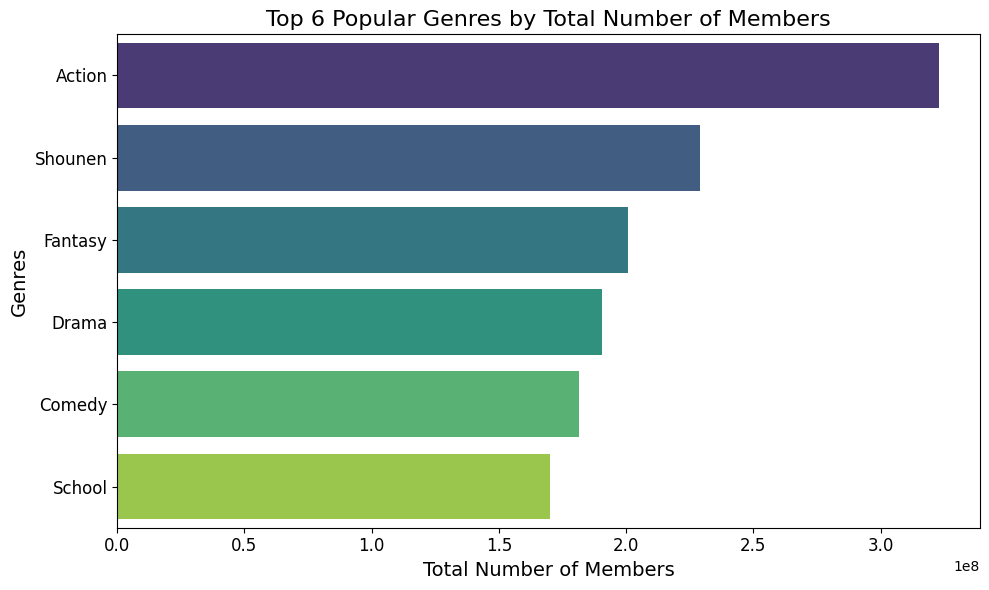

In [51]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=genre_popularity.values,
    y=genre_popularity.index,
    hue=genre_popularity.index,
    dodge=False,
    palette='viridis',
    legend=False
)

# Customize the plot
plt.title('Top 6 Popular Genres by Total Number of Members', fontsize=16)
plt.xlabel('Total Number of Members', fontsize=14)
plt.ylabel('Genres', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

### Conclusions
- It can be seen that the 6 Anime genres that viewers are most interested in are "Action", "Shounen", "Fantasy", "Drama", "Comedy" and "School"

## Question 07: How has the interest level of the 6 most popular Genres changed over the years ?

### Brief explanation
- Analyze the `Number of Members` for each `Genre` to determine how the interest level of the 6 most popular genres has changed over the years.

### Benefits of finding answer
- **Understand** the trends in popularity over time for the most appealing genres.
- Help creators and marketers align their content with audience preferences.

### Find the answer by using data
- Use the `Genres` and `Number of Members` columns.
- Split the `Genres` column into separate rows for each genre.
- Filter for the top 6 most popular genres based on total membership.
- Group the data by the `Genres` and `Year` columns.
- Calculate the total `Number of Members` for each genre by year.
- Visualize the results using a line plot to observe trends over time.

In [52]:
# Use the exploded data from Question 6 if it exists
if 'anime_data_exploded' in locals():
    anime_data_filtered = anime_data_exploded.copy()
else:
    # Create a copy and explode if not already done
    anime_data_filtered = anime_data_copy.copy()
    anime_data_filtered['Genres'] = anime_data_filtered['Genres'].str.split(', ')
    anime_data_filtered = anime_data_filtered.explode('Genres')

# Filter for the top 6 popular genres
top_genres = ["Action", "Shounen", "Fantasy", "Drama", "Comedy", "School"]
filtered_data = anime_data_filtered[anime_data_filtered['Genres'].isin(top_genres)]

# Calculate total members by genre and year
genre_trends = filtered_data.groupby(['Genres', 'Year'])['Number of Members'].sum().reset_index()

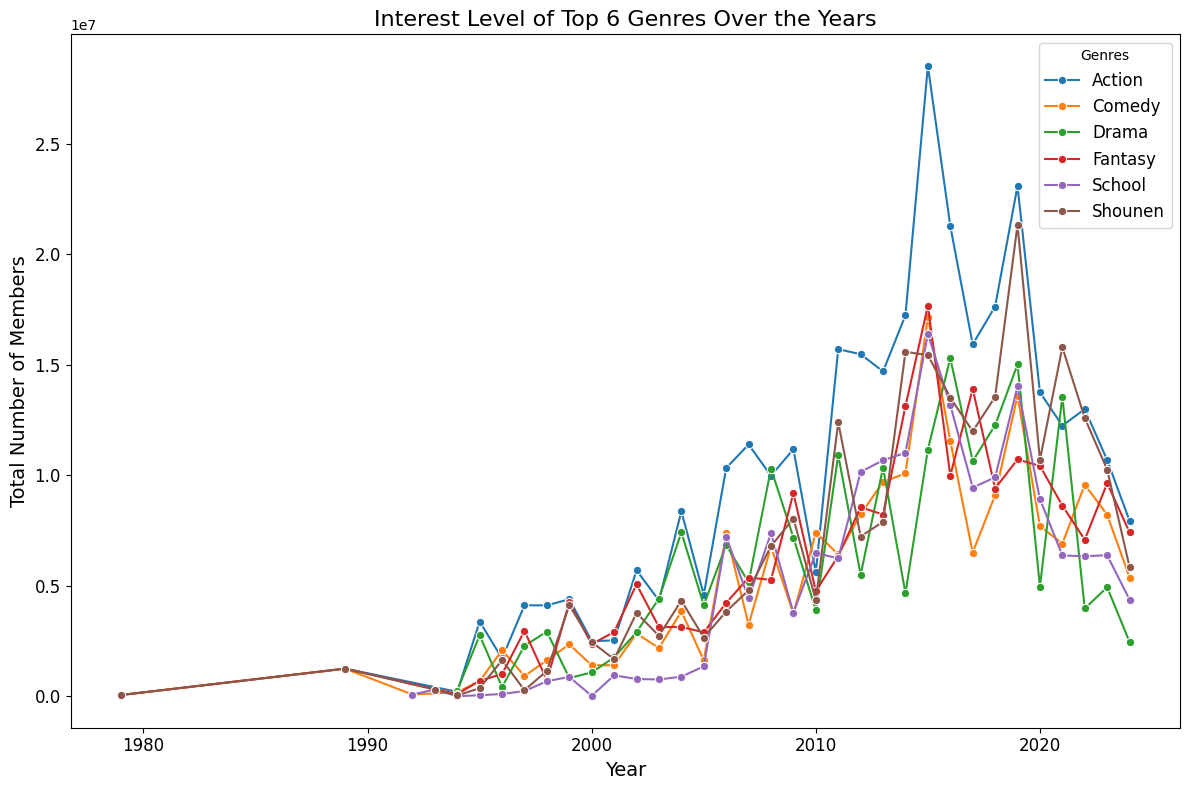

In [53]:
# Plot the trends
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=genre_trends,
    x='Year',
    y='Number of Members',
    hue='Genres',
    marker='o',
    palette='tab10'
)

# Customize the plot
plt.title('Interest Level of Top 6 Genres Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Members', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Genres', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

### General trend:
- All genres have a tendency to increase in the number of people interested in the period from 1980 to 2015, with the peak in 2015 having the largest number of people interested
- After 2015, the number of people interested tends to decrease quite a bit, which can be explained by the fact that this is the time when studios shifted to making long-form films to attract more viewers, leading to the gradual decrease of small series.
### Prominence of the "Action" genre:
- The Action genre has a higher level of interest than other genres, especially in the period after 2010.
- This can be due to the release of prominent action anime series such as Attack on Titan, Naruto, or My Hero Academia.
### The "Shounen" and "Fantasy" genres follow closely:
- Shounen and Fantasy also recorded significant growth, often associated with the Action genre.
- This shows that young audiences and adventure and fantasy content still dominate the taste.
### The "Comedy", "Drama" and "School" genres are more stable:
- Genres such as Comedy, Drama, and School tend to grow but not as strongly as the above genres.
- These genres can focus on light, everyday or emotional content, so their audience is more stable and less volatile.

## Question 8: What are the Top 6 Genres with the least popularity over the past years?

### Brief explanation
- Analyze the `Number of Members` for each `Genre` to determine the least popular genres based on total membership.

### Benefits of finding answer
- **Identify** the genres that have the smallest audience.
- Help content creators understand which genres might need more marketing or a unique approach to attract viewers.

### Find the answer by using data
- Use the `Genres` and `Number of Members` columns.
- Split the `Genres` column into separate rows for each genre.
- Group the data by the `Genres` column.
- Calculate the total `Number of Members` for each genre.
- Sort the results to identify the top 6 genres with the least popularity.
- Visualize the results using a horizontal bar plot.

In [54]:
# Calculate the total number of members for each genre
genre_popularity = anime_data_filtered.groupby('Genres')['Number of Members'].sum()

# Identify the 6 least popular genres
top_least_popular_genres = genre_popularity.nsmallest(6)
# Display the results
print("Top 6 Genres with the Least Popularity:")
print(top_least_popular_genres)

Top 6 Genres with the Least Popularity:
Genres
Magical Sex Shift     224970
Idols (Male)          263440
Pets                  492917
Villainess            737540
Educational          1259427
Boys Love            1612551
Name: Number of Members, dtype: int64


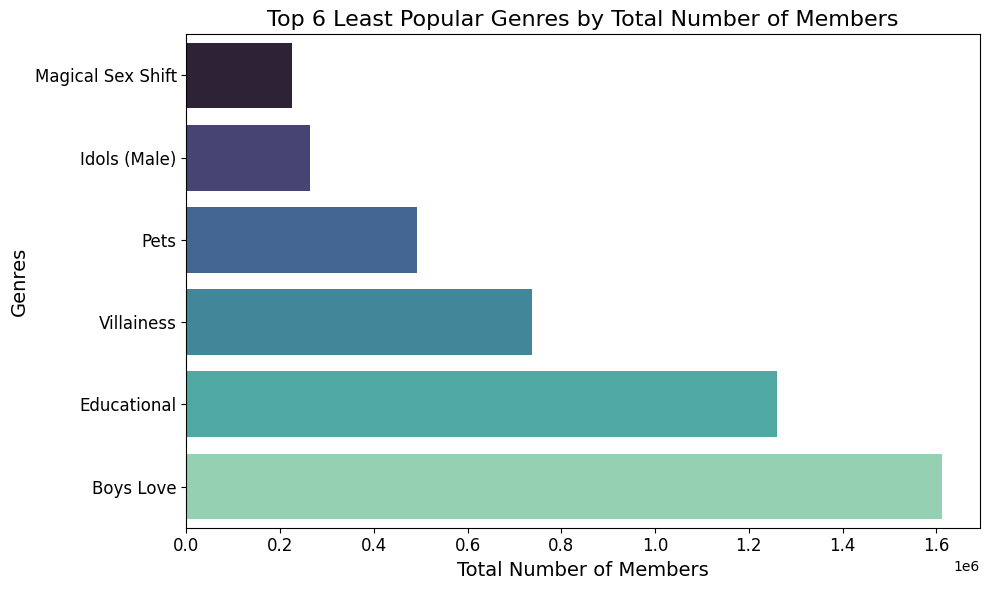

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_least_popular_genres.values,
    y=top_least_popular_genres.index,
    hue=top_least_popular_genres.index,
    palette='mako',
    dodge=False,
    legend=False
)

# Customize the plot
plt.title('Top 6 Least Popular Genres by Total Number of Members', fontsize=16)
plt.xlabel('Total Number of Members', fontsize=14)
plt.ylabel('Genres', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

### Conclusions
- It can be seen that the 6 Anime genres that viewers are least interested in are "Magical Sex Shift", "Idols (Male)", "Pets", "Villainess", "Educational" and "Boys Love"

## Question 9: How has the interest level of the 6 least popular Genres changed over the years?

### Brief explanation
- Analyze the `Number of Members` for each `Genre` to determine how the interest level of the 6 least popular genres has changed over the years.

### Benefits of finding answer
- **Understand** the trends in popularity over time for the least appealing genres.
- Help creators identify opportunities to improve the appeal of these genres.

### Find the answer by using data
- Use the `Genres` and `Number of Members` columns.
- Split the `Genres` column into separate rows for each genre.
- Filter for the 6 least popular genres based on total membership.
- Group the data by the `Genres` and `Year` columns.
- Calculate the total `Number of Members` for each genre by year.
- Visualize the results using a line plot to observe trends over time.

In [56]:
# Filter for the 6 least popular genres
least_popular_genres = ["Magical Sex Shift", "Idols (Male)", "Pets", "Villainess", "Educational", "Boys Love"]
filtered_data = anime_data_filtered[anime_data_filtered['Genres'].isin(least_popular_genres)]

# Calculate total members by genre and year
genre_trends = filtered_data.groupby(['Genres', 'Year'])['Number of Members'].sum().reset_index()

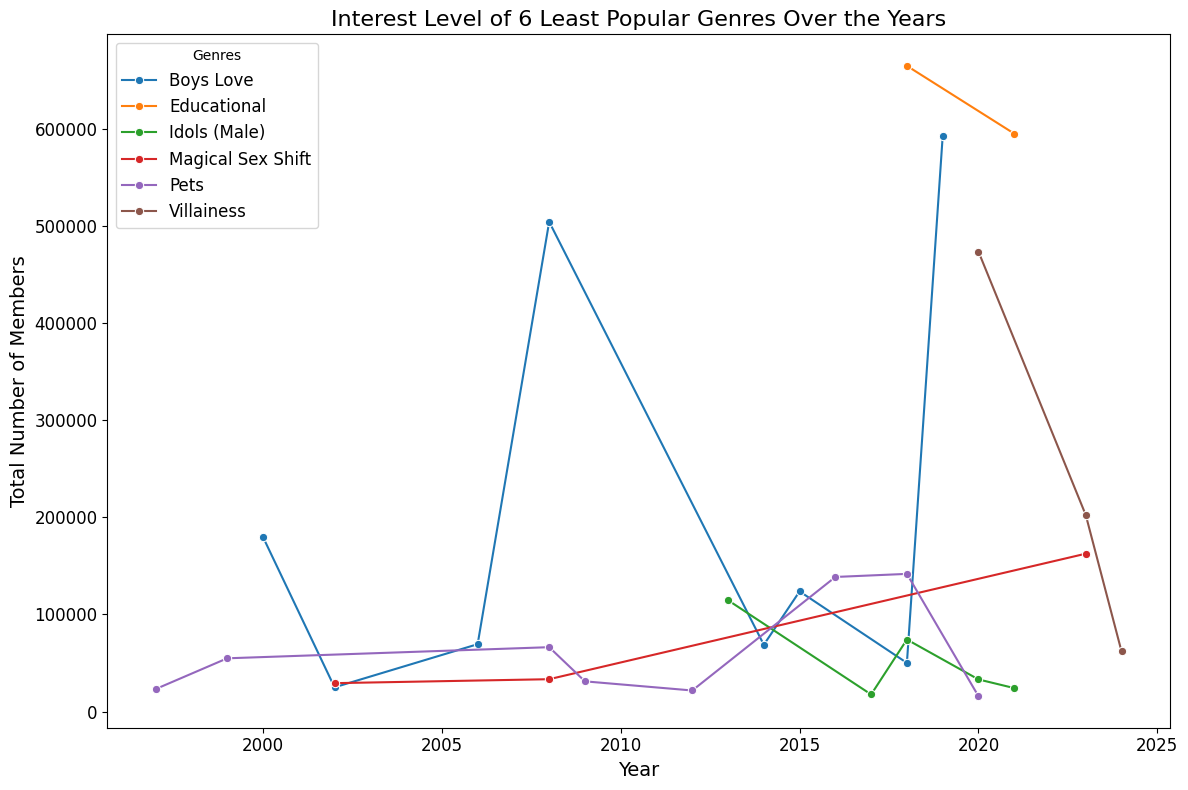

In [57]:
# Plot the trends
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=genre_trends,
    x='Year',
    y='Number of Members',
    hue='Genres',
    marker='o',
    palette='tab10'
)

# Customize the plot
plt.title('Interest Level of 6 Least Popular Genres Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Members', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Genres', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

### "Pets" and "Magical Sex Shift" genres:
- The "Pets" genre appeared before 2000, while "Magical Sex Shift" appeared after 2000, specifically in 2002.
- There was a tendency for the number of interested people to fluctuate not too significantly, developing steadily, however, after 2020, these two genres gradually disappeared
### "Idol", "Educational" and "Villainess" genres:
- All appeared at a relatively short time compared to current genres. "Idol" is 2013, "Educational" is 2018, "Villainess" is 2021
- The "Idol" and "Educational" genres disappeared in 2021, while "Villainess" seems to continue in 2024.
### "Boys Love" genre:
- Appeared in 2000
- Membership grew strongly in 2008 and 2019
- Disappeared in 2020.

## Question 10: Change in the number of anime of the 6 highest/lowest genres over the years?

### Brief explanation
- Analyze the change in the **number of anime produced** for the 6 most popular and 6 least popular genres over the years.

### Benefits of finding answer
- **Understand** how production trends vary across genres with different levels of popularity.
- Help creators and studios identify which genres are being overproduced or underproduced.

### Find the answer by using data
- Use the `Genres` and `Year` columns.
- Split the `Genres` column into separate rows for each genre.
- Filter for the top 6 most popular and least popular genres based on total membership.
- Count the number of anime for each genre by year.
- Visualize the results using two line plots: one for the most popular genres and one for the least popular genres.

In [58]:
# Define the top 6 most popular genres and the least popular genres
top_genres = ["Action", "Shounen", "Fantasy", "Drama", "Comedy", "School"]
least_popular_genres = ["Magical Sex Shift", "Idols (Male)", "Pets", "Villainess", "Educational", "Boys Love"]

# Filter data for both sets of genres
top_genres_data = anime_data_filtered[anime_data_filtered['Genres'].isin(top_genres)]
least_genres_data = anime_data_filtered[anime_data_filtered['Genres'].isin(least_popular_genres)]

# Count the number of anime for each genre by year
top_genres_count = top_genres_data.groupby(['Genres', 'Year']).size().reset_index(name='Anime Count')
least_genres_count = least_genres_data.groupby(['Genres', 'Year']).size().reset_index(name='Anime Count')

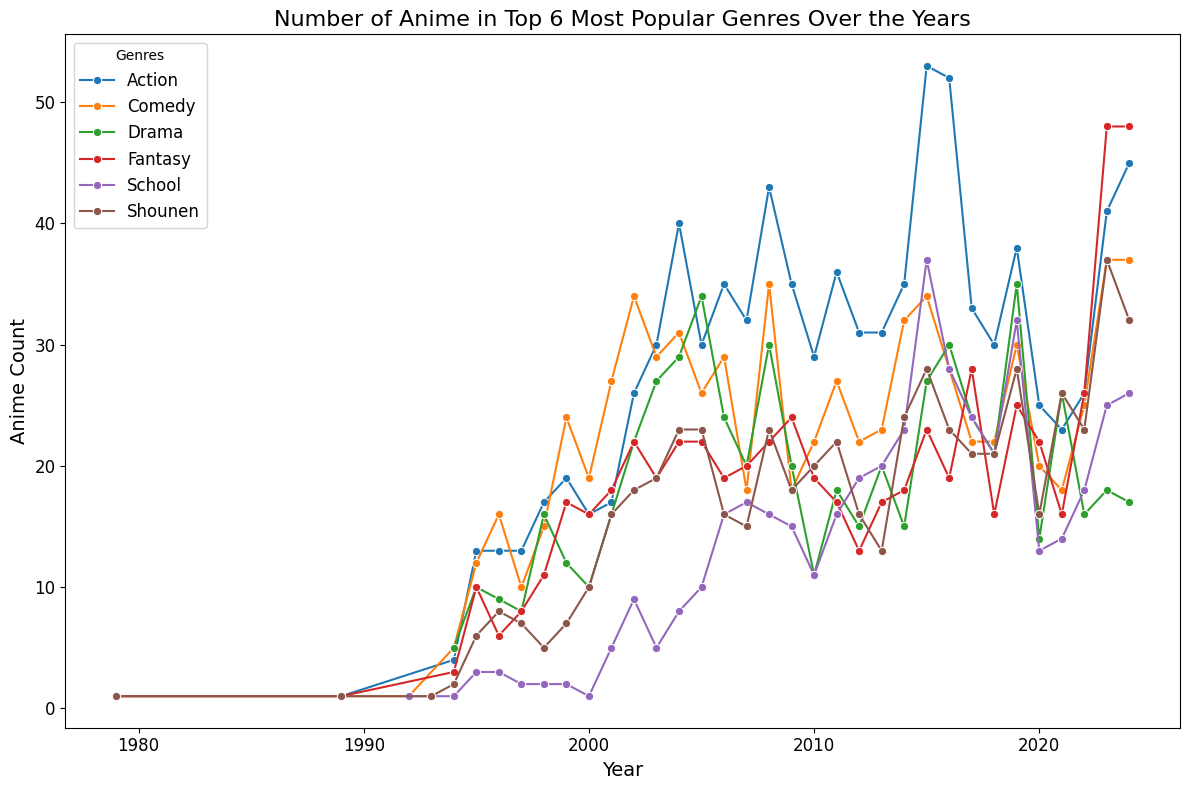

In [59]:
# Plot for top 6 most popular genres
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=top_genres_count,
    x='Year',
    y='Anime Count',
    hue='Genres',
    marker='o',
    palette='tab10'
)
plt.title('Number of Anime in Top 6 Most Popular Genres Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Anime Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Genres', fontsize=12)
plt.tight_layout()
plt.show()

### General growth trends:
- The number of anime in the 6 most popular genres has been increasing significantly from 1995 to 2018.
- This steady increase shows that producers have invested heavily in genres that attract a large audience such as Action, Shounen, and Fantasy.
- The number of anime series has been decreasing from 2018 to 2020, then gradually increasing again by 2024
- Genres such as Drama and School have maintained a more stable growth rate, not exploding but still maintaining regular production.

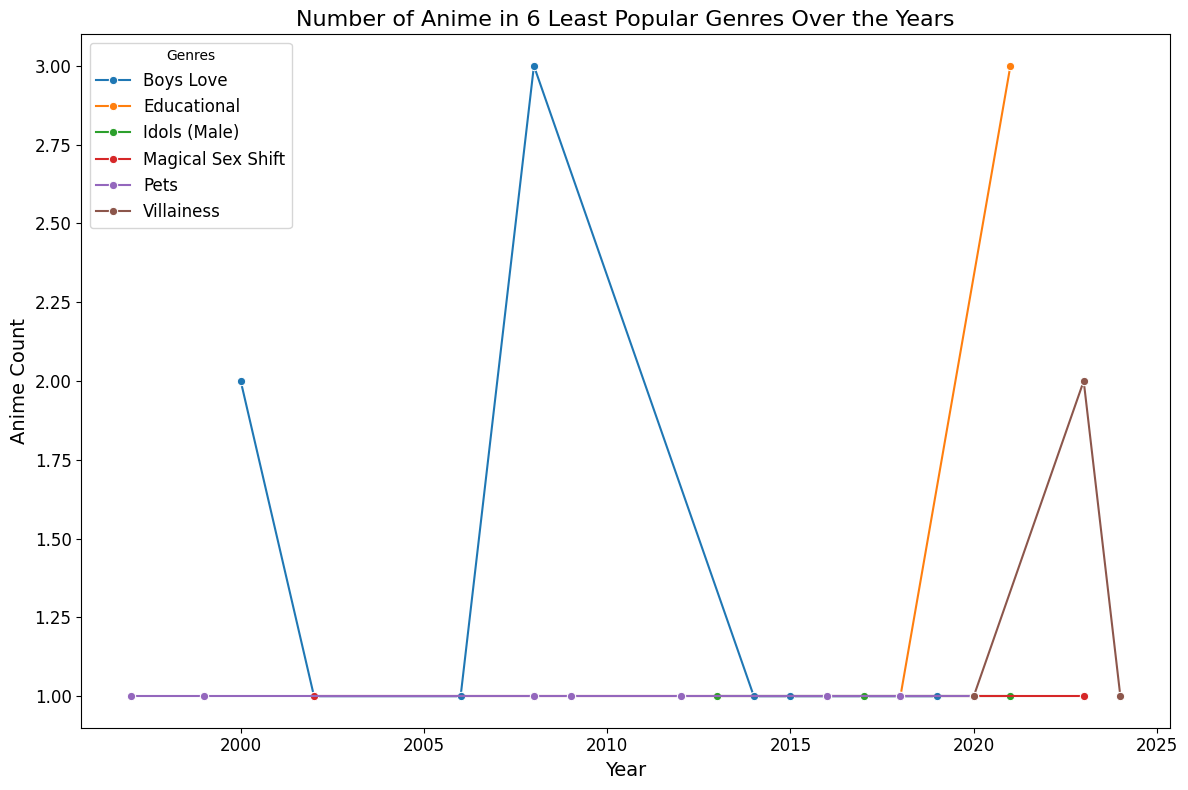

In [60]:
# Plot for 6 least popular genres
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=least_genres_count,
    x='Year',
    y='Anime Count',
    hue='Genres',
    marker='o',
    palette='tab10'
)
plt.title('Number of Anime in 6 Least Popular Genres Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Anime Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Genres', fontsize=12)
plt.tight_layout()
plt.show()

### General growth trend:
- In general, with these genres, the number of series containing this genre is only from 1 to 3 series with all years
- This proves that studios do not produce anime series with this genre because they are not interested in viewers as much as other genres.